# **Data Visualization**
As we've seen, data visualization is the graphical representation of information and data.

It provides an accessible way to see and understand data,
notably through graphs and charts.


# **Depending on the nature of the data, different types of variables can be distinguished**

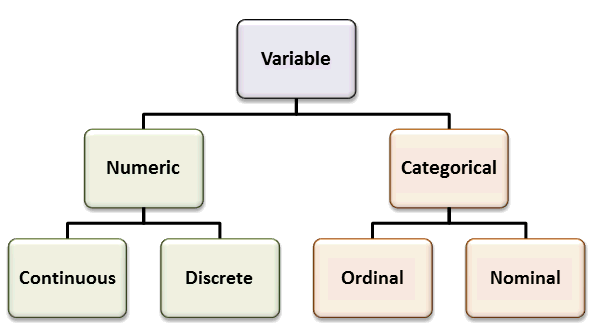


**Within the *quantitative* (numeric) variables, there are discrete and continuous variables :**
* Discrete variables are variables whose value is obtained by counting (eg: number of students in the classroom) 
* Continuous variables are variables whose value is obtained by measuring (eg: age)

**Within the *categorical* variables, there are ordinal and nominal variables :**
* Ordinal variables are variables with an ordered series (eg: performance)
* Nominal variables are variables with no inherent or ranking sequence (eg: gender)

## **Why does it matter?**

it is very important to differentiate the types of variables because they will not be represented in the same way !

Typically, we would use **bar charts** to represent categorical variables, and **histograms** to represent continuous variables.



# **Handling different kinds of variables with Python**

## 1. How to visually represent *categorical* variables?

## **1.1. Creating a bar chart using Pandas**


In [ ]:
# First of all, let's import pandas
import pandas as pd

In [ ]:
# Step 1 - Load the data you want to analyze

my_link = "https://raw.githubusercontent.com/datamisc/ts-2020/main/data.csv"
df = pd.read_csv(my_link, compression='gzip')

df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (15,17,18,19,21,22,23,25,26,27,29,30,31,33,34,35,37,38,1508,1509) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,version,V200001,V160001_orig,V200002,V200003,V200004,V200005,V200006,V200007,V200008,V200009,V200010a,V200010b,V200010c,V200010d,V200011a,V200011b,V200011c,V200011d,V200012a,V200012b,V200012c,V200012d,V200013a,V200013b,V200013c,V200013d,V200014a,V200014b,V200014c,V200014d,V200015a,V200015b,V200015c,V200015d,V200016a,V200016b,V200016c,V200016d,V201001,...,V203401,V203402,V203403,V203404,V203405,V203406,V203410,V203411,V203412,V203413,V203414,V203415,V203416,V203500,V203501,V203502,V203503,V203504,V203505,V203506,V203508,V203509,V203510,V203511,V203512,V203513,V203514,V203515,V203516,V203517,V203518,V203519,V203520,V203521,V203522,V203523,V203524,V203525,V203526,V203527
0,ANES2020TimeSeries_20210719,200015,401318,3,2,3,0,-2,-2,-2,0,0.962809,1.00573747444017,2,9,0.689054,.880887099636969,2,9,,,,,,,,,,,,,,,,,0.996745,.973874052814516,2,9,1,...,-1,-1,-1,-1,-1,-1,-1. Inapplicable,-1,-1,-1,-1,-1,-1,21,-1. Inapplicable,-1,-1,-1. Inapplicable,-1,-1,Abby Broyles,2,James M. 'Jim' Inhofe,1,-1. Inapplicable,-1,-1,29,Mary Brannon,2,Thomas Jeffery 'Tom' Cole,1,-1. Inapplicable,-1,-1,82,-1. Inapplicable,-1,-1. Inapplicable,-1
1,ANES2020TimeSeries_20210719,200022,300261,3,2,3,0,4,-1,3,0,1.069085,1.16347312190926,2,26,1.08926,1.07183615863668,2,26,,,,,,,,,,,,,,,,,1.05886,1.1492021732751,2,26,1,...,-1,-1,-1,-1,-1,-1,-1. Inapplicable,-1,-1,-1,-1,-1,-1,21,-1. Inapplicable,-1,-1,-1. Inapplicable,-1,-1,Paulette Jordan,2,James E. 'Jim' Risch,1,-1. Inapplicable,-1,-1,29,Carlton Aaron Swisher,1,Michael Keith 'Mike' Simpson,1,-1. Inapplicable,-1,-1,-1,-1. Inapplicable,-1,-1. Inapplicable,-1
2,ANES2020TimeSeries_20210719,200039,400181,3,2,3,0,-2,-2,-2,0,0.683421,.768681110109909,1,41,0.688799,.609030746771271,1,41,,,,,,,,,,,,,,,,,0.681142,.756230992003099,1,41,1,...,-1,-1,-1,-1,-1,-1,-1. Inapplicable,-1,-1,-1,-1,-1,-1,12,-1. Inapplicable,-1,-1,-1. Inapplicable,-1,-1,Mark Robert Warner,1,Daniel MacArthur Gade,1,-1. Inapplicable,-1,-1,19,Elaine G. Luria,2,Scott William Taylor,1,-1. Inapplicable,-1,-1,81,-1. Inapplicable,-1,-1. Inapplicable,-1
3,ANES2020TimeSeries_20210719,200046,300171,3,2,3,0,-2,-2,-2,0,0.500953,.521019534357875,2,29,0.731815,.741575767882139,2,29,,,,,,,,,,,,,,,,,0.474365,.494633933446847,2,29,1,...,-1,-1,-1,-1,-1,-1,-1. Inapplicable,-1,-1,-1,-1,-1,-1,81,Dianne Feinstein,2,1,-1. Inapplicable,2,1,-1. Inapplicable,-1,-1. Inapplicable,-1,-1. Inapplicable,-1,-1,21,Phil Arballo,1,Devin Gerald Nunes,1,-1. Inapplicable,-1,-1,81,-1. Inapplicable,-1,-1. Inapplicable,-1
4,ANES2020TimeSeries_20210719,200053,405145,3,2,3,1,-2,-2,-2,0,1.262294,.965789166832749,1,23,1.01399,.942968665310746,1,23,,,,,,,,,,,,,,,,,1.26881,.934799353716296,1,23,1,...,-1,-1,-1,-1,-1,-1,-1. Inapplicable,-1,-1,-1,-1,-1,-1,21,-1. Inapplicable,-1,-1,-1. Inapplicable,-1,-1,John W. Hickenlooper,1,Cory Scott Gardner,1,-1. Inapplicable,-1,-1,29,Isaac Ian 'Ike' McCorkle,1,Kenneth R. 'Ken' Buck,1,-1. Inapplicable,-1,-1,81,-1. Inapplicable,-1,-1. Inapplicable,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8275,ANES2020TimeSeries_20210719,535315,-1,1,6,3,0,-2,-2,-2,0,1.052041,2.54194059520904,1,3,,,,,,,,,,,,,0.701441,1.79813939654805,1,3,0.673649,1.49145229866225,1,3,,,,,1,...,3,1,2,2,2,2,DC4913,3,1,1,2,2,3,82,Marco Rubio,1,2,Rick Scott,1,2,-1. Inapplicable,-1,-1. Inapplicable,-1,-1. Inapplicable,-1,-1,24,-1. Inapplicable,-1,Neal Patrick Dunn,1,-1. Inapplicable,-1,-1,82,-1. Inapplicable,-1,-1. Inapplicable,-1
8276,ANES2020TimeSeries_20210719,535360,-1,1,6,3,0,1,1,1,0,1.124100,.90712251661077,2,5,,,,,,,,,,,,,1.19977,1.17601864450073,2,5,1.15223,.975439231228371,2,5,,,,,1,...,3,3,2,2,1,3,DC3645,-2,-2,-2,-2,-2,-2,21,-1. Inapplicable,-1,-1,-1. Inapplicable,-1,-1,Paulette Jordan,2,James E. 'Jim' Risch,1,-1. Ina

In [ ]:
# Step 2: take a look at the data
# To get the number of rows and columns, use df.shape
df.shape

(8280, 1771)

## **Let's create our graph!**

We want to look at the question "For whom does R intend to vote for President?" (ANES, V201033)

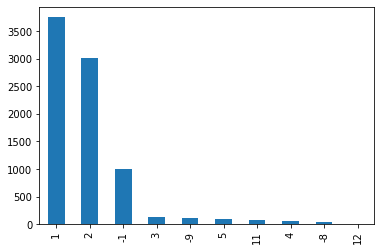

In [ ]:
# Step 3: Create the graph

# To view all the observations in the table, use values_count()
# Remember,'bar' means bar chart

df["V201033"].value_counts().plot(kind="bar")

## **1.2. Improving our graph**


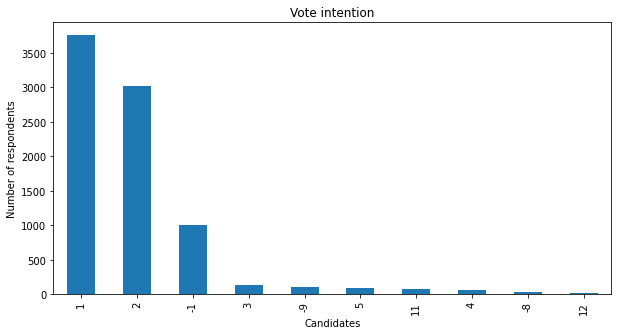

In [ ]:
# Step 4: Add a title to the graph

df["V201033"].value_counts().plot(kind="bar", title="Vote intention", xlabel="Candidates", ylabel="Number of respondents", figsize=(10,5))

# Use figsize(width, height) if you want to change the sizes of the graph

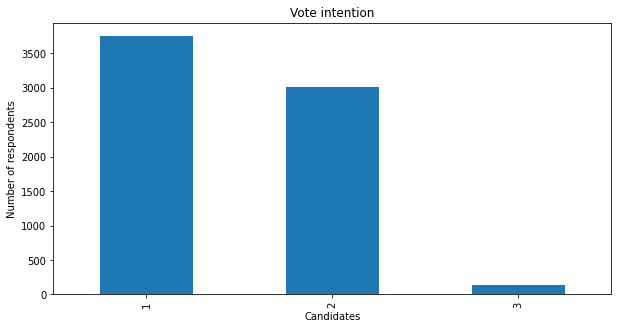

In [ ]:
# Step 5: Select only certain data. In this case, we only want the top three candidates in the polls

# Use df.loc to access a certain group of columns

my_fiter = (df["V201033"] >= 1) & (df["V201033"] <= 3)
df = df.loc[my_fiter]
df["V201033"].value_counts().plot(kind="bar", title="Vote intention", xlabel="Candidates", ylabel="Number of respondents", figsize=(10,5))

### **1.3. Recoding our variable**

As Joe Biden is represented by "1", we can recode to name our column "Biden"

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


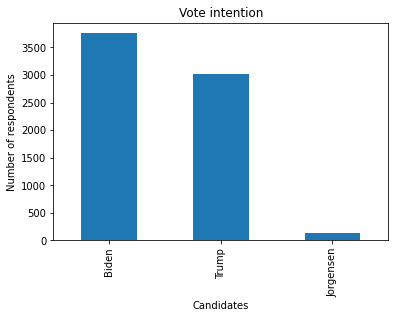

In [ ]:
# Step 5: recode the variable using df.loc
# Don't forget to use two ==

Biden = df["V201033"] == 1
df.loc[Biden,"V201033"] = "Biden"

Trump = df["V201033"] == 2
df.loc[Trump,"V201033"] = "Trump"

Jorgensen = df["V201033"] == 3
df.loc[Jorgensen,"V201033"] = "Jorgensen"


df["V201033"].value_counts().plot(kind="bar", title="Vote intention", xlabel="Candidates", ylabel="Number of respondents")

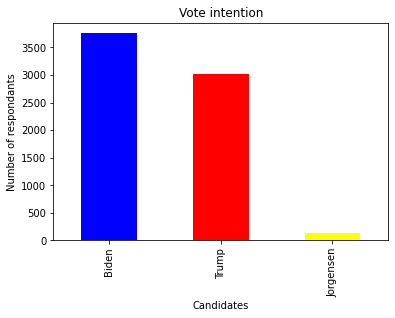

In [ ]:
# Step 6: let's add some colors to our graph !

df["V201033"].value_counts().plot(kind="bar", title="Vote intention", xlabel="Candidates", ylabel="Number of respondants", color=['blue','red','yellow'])

## **1.2. Creating a pie chart using Pandas**

A categorical variable can also be represented by a pie chart

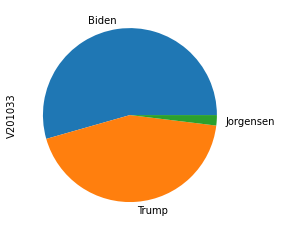

In [ ]:
# It is very easy! Instead of plot.(kind="bar"), use plot.pie()

df["V201033"].value_counts().plot.pie()

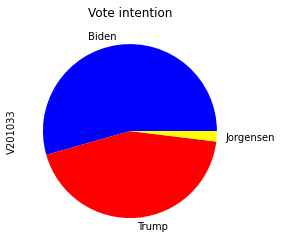

In [ ]:
# Now let's improve our pie chart with a title and colors
# Don't forget to put the colors in the right order

df["V201033"].value_counts().plot.pie (title="Vote intention", colors=['blue','red','yellow'])

## 2. How to visually represent *continuous* variables?

A **histogram** is typically used to represent discrete or continuous data

In this case, we want to analyse "**Respondent age**" (ANES, V201507x), a continuous data


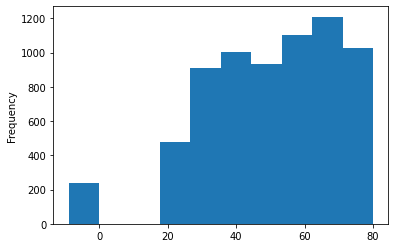

In [ ]:
# Instead of plot(kind="bar"), use plot(kind="hist") to create a histogram

df["V201507x"].plot(kind="hist")

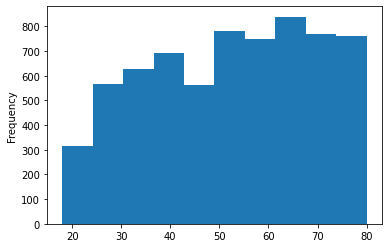

In [ ]:
# We want to remove the negative, unusable data (under the age of 18)
# Once again, use df.loc

filter_age = (df["V201507x"] >= 18) & (df["V201507x"] <= 80)
df_age = df.loc[filter_age]

df_age["V201507x"].plot(kind="hist")




## 3. How to link two data sets?

It is possible to link two different kinds of data.

To analyse, for example, the age of those who intend to vote for Biden compared to the age of those who intend to vote for Trump.

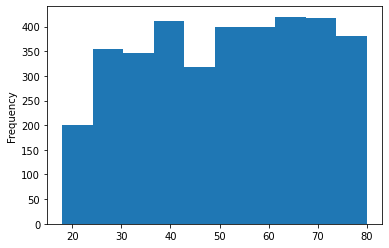

In [ ]:
# Step 1: let's see how old are the people who intend to vote for Biden

# Use the "&" to link V201507x (age of respondents) and V201033 (vote intention)
# Here, we only want the vote intention for Biden, so use (df["V201033"]==Biden)

filter_biden = (df["V201507x"] >= 18) & (df["V201507x"] <= 80) & (df["V201033"]=="Biden")
df_biden = df.loc[filter_biden]

# Now let's create a histogram to see the result
df_biden["V201507x"].plot(kind="hist")


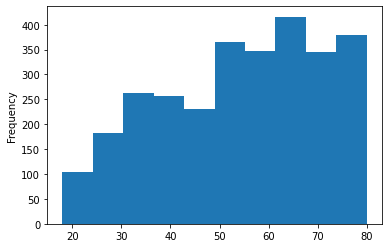

In [ ]:
# Now let's do the same for Trump !

filter_trump = (df["V201507x"] >= 18) & (df["V201507x"] <= 80) & (df["V201033"]=="Trump")
df_trump = df.loc[filter_trump]

df_trump["V201507x"].plot(kind="hist")

## References

[Chart Visualization. (ND).](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) 

Shovic, J. & Simpson, A. (2021). Python All-in-One For Dummies (Second edition).

Grus, J. (2015). Chapter 3- Visualizing Data. In Data science from scratch: First principles with Python (First edition, pp. 72–84). O’Reilly.

## Resources

- [Data Center - ANES - American National Election Studies](https://electionstudies.org/data-center/2020-time-series-study/) : 2020 Time Series Study

- [Basic Analytics in Python](https://www.sfu.ca/~mjbrydon/tutorials/BAinPy/05_recode.html) : How to import, filter, recode data,...

